In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split



%matplotlib inline 

<b> Loading the dataset </b>

In [2]:
Train_data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
Test_data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

In [3]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
Test_data.shape

(5681, 11)

In [6]:
print('Train_data:', Train_data.shape)
print('Test_data:', Test_data.shape)

Train_data: (8523, 12)
Test_data: (5681, 11)


In [7]:
Train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<b> It shows that there are 1463 and 2410 missing values on Item_Weight and on Outlet_Size respectively from the train dataset</b>

In [9]:
Test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<b> shows that there are 976 and 1606 missing values from Item_Weight and on Outlet_Size respectively from the test dataset </b>

In [11]:
#combining the data into a single datafarme

Train_data['source'] = 'train'
Test_data['source'] = 'test'
df = pd.concat((Train_data,Test_data),ignore_index=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [12]:
df.shape

(14204, 13)

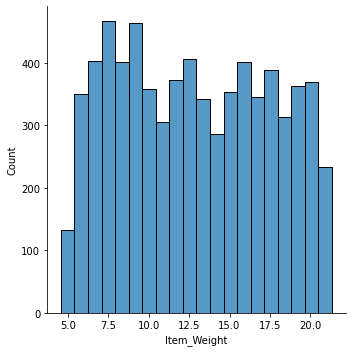

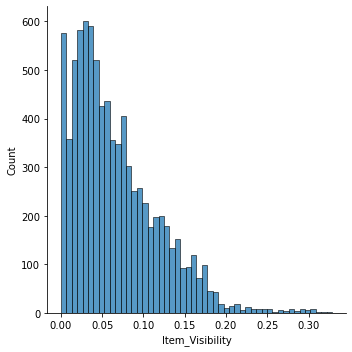

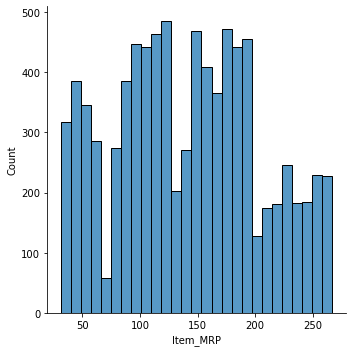

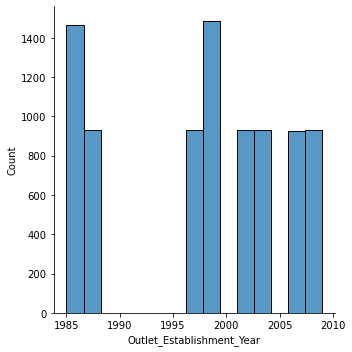

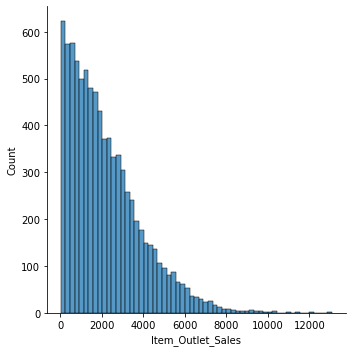

In [13]:
#checking for the skewness in the training data set

for i in Train_data.describe().columns:
    sns.displot(Train_data[i].dropna())
    plt.show()

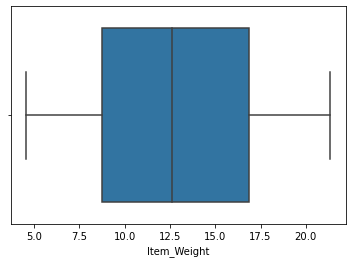

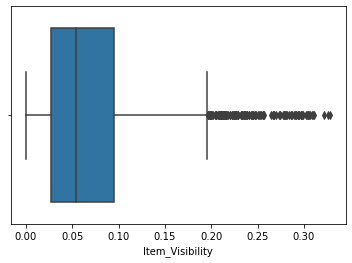

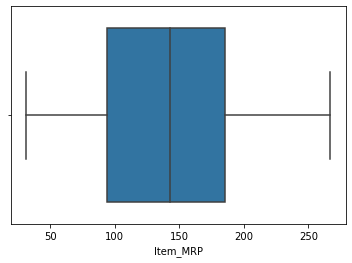

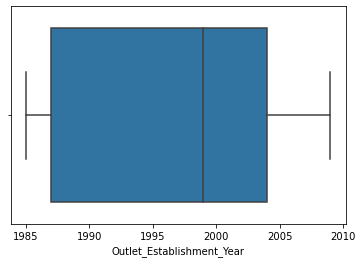

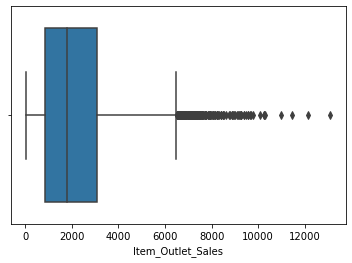

In [14]:
#checking the same using box plot

for i in Train_data.describe().columns:
    sns.boxplot(Train_data[i].dropna())
    plt.show()

 we see right skewness on Item_visibility and Item_Outlet_sales dataset column 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

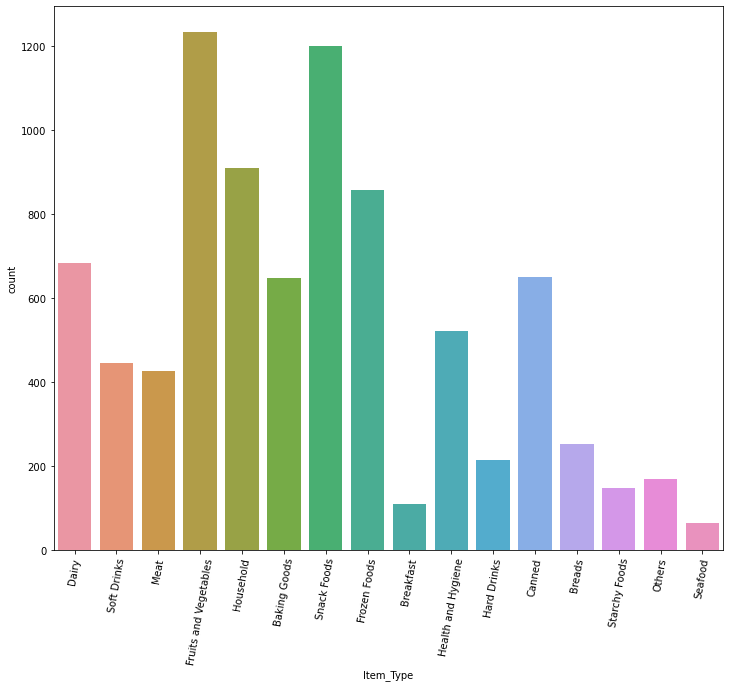

In [15]:
#counting the number of items present in Item_Type

plt.figure(figsize=(12,10))
sns.countplot(Train_data.Item_Type)
plt.xticks(rotation=80)

In [16]:
Train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

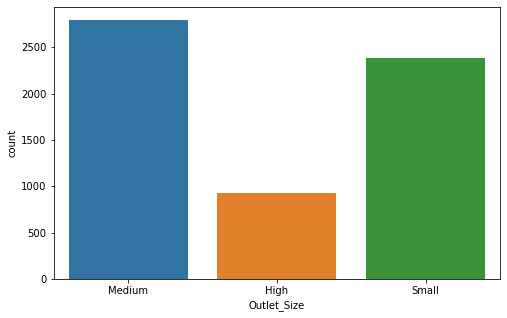

In [17]:
#checking the distribution of Outlet_size

plt.figure(figsize=(8,5))
sns.countplot(Train_data.Outlet_Size)

In [18]:
Train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

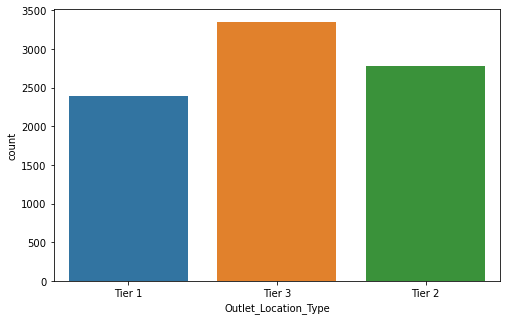

In [19]:
#checking the distribution of Outlet_Loation_type

plt.figure(figsize=(8,5))
sns.countplot(Train_data.Outlet_Location_Type)

In [20]:
Train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

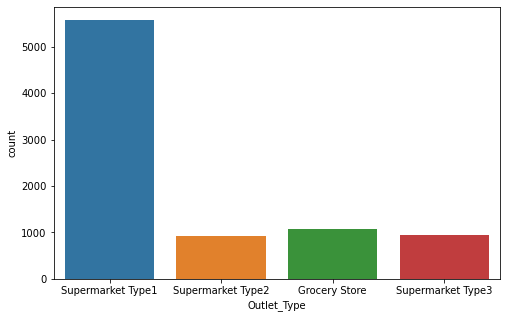

In [21]:
#checking the distribution of Outlet_type

plt.figure(figsize=(8,5))
sns.countplot(Train_data.Outlet_Type)

In [22]:
Train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:title={'center':'Item_weight and Item_outlet_sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_sales'>

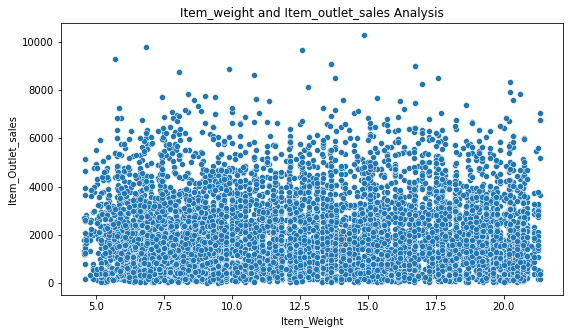

In [23]:
#Checking the correlation between Item weight and Item outlet sales

plt.figure(figsize=(9,5))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_sales")
plt.title("Item_weight and Item_outlet_sales Analysis")
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=Train_data)

<b> we don't see much correlation here so the slaes has nothing to do with Item weight </b>

<AxesSubplot:title={'center':'Item_Visibility and Item_outlet_sales Analysis'}, xlabel='Item_Visibility', ylabel='Item_Outlet_sales'>

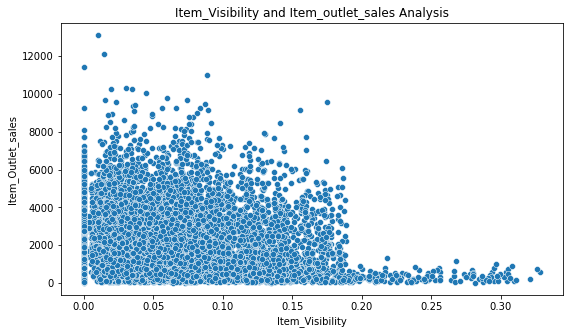

In [24]:
#Checking the correlation between Item Visibility and Item outlet sales

plt.figure(figsize=(9,5))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_sales")
plt.title("Item_Visibility and Item_outlet_sales Analysis")
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=Train_data)

both are not correlated as Item with high visibilty also has low sales

<AxesSubplot:title={'center':'Item_Visibility and Maximum retail price analysis'}, xlabel='Item_Visibility', ylabel='Maximum retail price'>

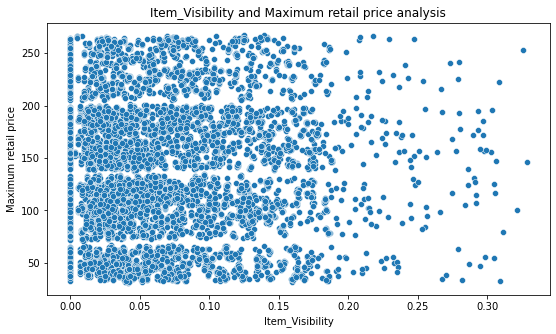

In [25]:
#Checking the correlation between Item Visibilty and MAximum retail price

plt.figure(figsize=(9,5))
plt.xlabel("Item_Visibility")
plt.ylabel("Maximum retail price")
plt.title("Item_Visibility and Maximum retail price analysis")
sns.scatterplot(x='Item_Visibility', y='Item_MRP', data=Train_data)

Text(0.5, 1.0, 'Impact of Outlet_type on Item_Outlet_Sales')

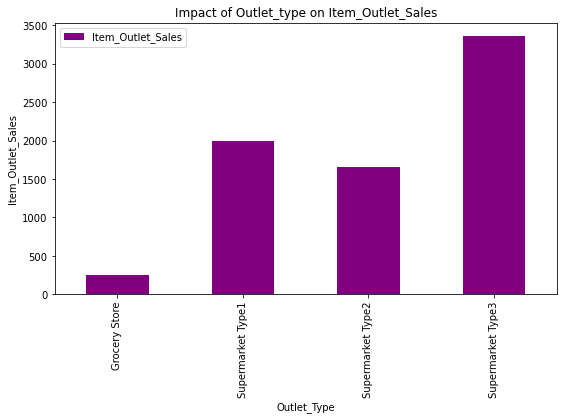

In [26]:
#checking the Impact of Outlet type on Item outlet sales

Outlet_Type_pivot = \
Train_data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='purple', figsize=(9,5))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_type on Item_Outlet_Sales")


Text(0.5, 1.0, 'Impact of Item_Fat_Content on Item_Outlet_Sales')

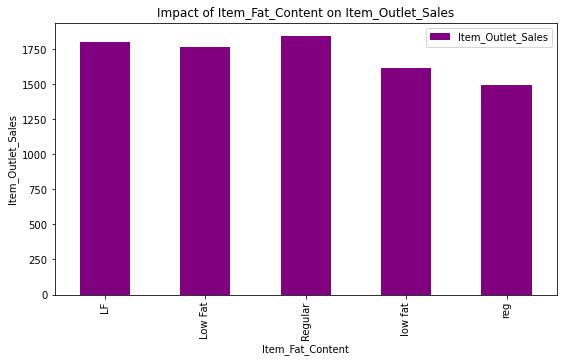

In [27]:
#checking the Impact of Item_Fat_Content on Item_Outlet_Sales

Outlet_Type_pivot = \
Train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='purple', figsize=(9,5))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")

This shows that the fat content doesn't have any impact on the sales

Since the Low fat and LF are same and Regular is equal to Reg, we will have a common name for all

In [28]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [29]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [31]:
#changing the naming convention in the train data set to do analysis on Train data

Train_data['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low fat'})
Train_data['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    3006
LF          316
Low fat     112
Name: Item_Fat_Content, dtype: int64

Text(0.5, 1.0, 'Impact of Item_Fat_Content on Item_Outlet_Sales')

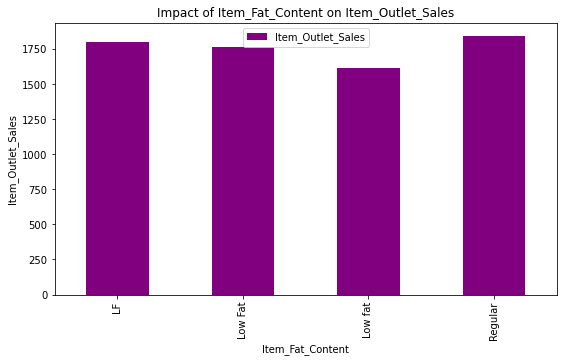

In [32]:
# checking the impact again

Outlet_Type_pivot = \
Train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='purple', figsize=(9,5))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")

In [33]:
#checking the correalation

Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

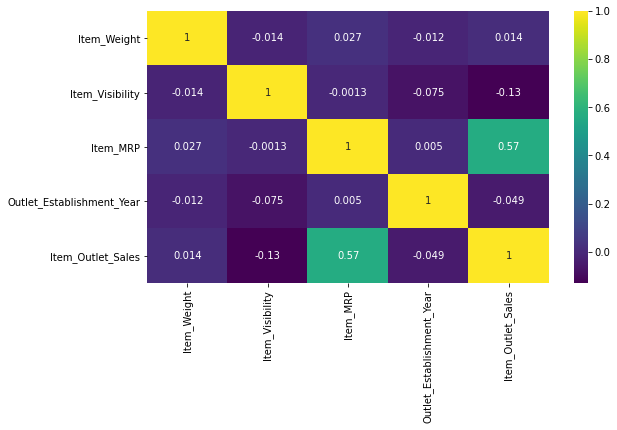

In [34]:
#checking the correlation on heat map as well

plt.figure(figsize=(9,5))
sns.heatmap(Train_data.corr(), vmax=1,annot=True,cmap='viridis')

we see that the Item_MRP has more correlation with sales

<b> Feature Engineering </b>

In [35]:
#Treating the missing values
    
df['Item_Weight'].mean()   #replacing the nan values with its mean 

12.792854228644991

In [36]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [37]:
# Treating the null value of Outlet_size
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [38]:
#since most of the values are Medium , I will replace the nan with Medium

df['Outlet_Size'].fillna('Medium',inplace=True)

In [39]:
#checking if the null values are still present 

df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<b> Since the test data doesn't have the column Item_Outlet_Sales so nan will occur in the complete data set </b>

In [40]:
#Removing the skewness from Item_Visibility column

df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [41]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

In [42]:
#checking for Outlet_years

df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [43]:
#Checking the number of years the Outlets were established

df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [44]:
df['Item_Identifier'].value_counts()

FDY09    10
FDV38    10
FDE45    10
FDA39    10
FDY02    10
         ..
NCW54     7
FDM52     7
FDL50     7
FDM50     7
NCL42     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [45]:
#For better analysis ,I will create 3 categories instead of 16 
df['New_Item_type'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['New_Item_type'].value_counts()

FD    10201
NC     2686
DR     1317
Name: New_Item_type, dtype: int64

In [46]:
 # Marking non-consumables as separate category in low fat 
    
df.loc[df['New_Item_type']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [47]:
item_visib_avg = df.pivot_table(values='Item_Visibility',index='Item_Identifier')
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [48]:
function = lambda x:x ['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index ==x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(function,axis=1).astype(float)

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14,FD,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4,DR,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14,FD,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,15,FD,0.000000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26,NC,0.000000


<b> Dealing with Categorical Variable </b>

<b> Label encoder </b>

In [50]:
 # Converting categorical variables into numeric types (values 0 and 1)
    
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#New Variable for outlet

df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'New_Item_type', 'Outlet_Type','Outlet']
for i in varib:
    df[i] = label.fit_transform(df[i])
    

In [51]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,14,1,0.931078,9
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,4,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,14,1,0.960069,9
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,15,1,0.000000,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,26,2,0.000000,1


In [52]:
# Creating the dummy variables for these LAbel encoded variables in order to avoid algorithm ranking

df = pd.get_dummies(df, columns =['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'New_Item_type', 'Outlet_Type','Outlet'])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
O

In [53]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,26,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,Snack Foods,141.3154,OUT046,1997,NaN,test,16,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.60,0.142991,Starchy Foods,169.1448,OUT018,2009,NaN,test,4,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.00,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,test,11,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.30,0.000000,Canned,214.6218,OUT017,2007,NaN,test,6,...,0,0,1,0,0,0,0,0,0,0


# Model Building

In [54]:
#Since we have already craeted the 3 cateogory for the Item_Type I will get rid of this column as we have New_Item_Type and Outlet_establishment year we already have extracted the number of year so IW ill drop this column as well

df.drop(['Item_Type','Outlet_Establishment_Year'], axis=1,inplace=True)


In [55]:
#Separating the train and test data

train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [56]:
#dropping the source data as we have the train and test data now and we don't need it anymore

train.drop(['source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [57]:
#splitting the train and test data

x_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [58]:
x_test.shape

(5681, 30)

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)
lr_accuracy = round(lr.score(x_train,y_train) *100)
lr_accuracy

56

# DescisionTreeRegressor

In [60]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)
tree_pred = tree.predict(x_test)
tree_accuracy = round(tree.score(x_train,y_train) *100)
tree_accuracy


100

# RandomForestRegressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_accuracy = round(rf.score(x_train,y_train)*100)
rf_accuracy

94

# XGBoost Regressor

In [62]:

#!pip install xgboost==1.0.1

from xgboost import XGBRegressor
model = XGBRegressor(learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [63]:
y_pred = model.predict(x_test)
model.score(x_train,y_train)*100


67.83573356102414

# KNeighborsRegressor

In [64]:
from sklearn.neighbors import KNeighborsRegressor
# KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr_pred = knr.predict(x_test)
knr_accuracy = round(knr.score(x_train,y_train)*100)
knr_accuracy

66

# SVR

In [65]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)
svr_accuracy = round(svr.score(x_train,y_train)*100)
svr_accuracy

21

# GradientBoostingRegressor

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(x_test)
gbr_accuracy = round(gbr.score(x_train,y_train)*100)
gbr_accuracy

63

# AdaBoostRegressor

In [67]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred = abr.predict(x_test)
abr_accuracy = round(abr.score(x_train,y_train)*100)
abr_accuracy

48

# Lasso and Ridge

In [68]:
 from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [69]:
lassocv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)

alpha=lassocv.alpha_
alpha

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg_pred = lasso_reg.predict(x_test)
lasso_reg_accuracy = round(lasso_reg.score(x_train,y_train)*100)
lasso_reg_accuracy

56

In [70]:
ridcv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridcv.fit(x_train,y_train)

alpha=ridcv.alpha_
alpha

rid_reg=Ridge(alpha)
rid_reg.fit(x_train,y_train)
rid_reg_pred = rid_reg.predict(x_test)
rid_reg_accuracy = round(rid_reg.score(x_train,y_train)*100)
rid_reg_accuracy

56

# cross validation

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
m=[lr,tree,rf,model,knr,svr,gbr,abr,lasso_reg,rid_reg]
for i in m:
    scr=cross_val_score(i,x_train,y_train,cv=5)
    print('\n\n----------',i,'------------')
    print(f'score:{scr.mean()*100:.2f}') 



---------- LinearRegression() ------------
score:56.10


---------- DecisionTreeRegressor() ------------
score:16.93


---------- RandomForestRegressor() ------------
score:55.44


---------- XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None) ------------
score:58.34


---------- KNeighborsRegressor() ------------
score:48.35


---------- SVR() ------------
score:18.37


---------- GradientBoostingRegressor() ------------
score:59.19


---------- AdaBoostRegressor() ------------

# saving model

In [73]:
import pickle
filename='big_data_mart_new.pkl'
pickle.dump(lr,open(filename,'wb'))

# load model

In [74]:
prediction_model=pickle.load(open(filename,'rb'))

In [75]:
prediction_model

LinearRegression()

In [76]:
pred_test_dataset=prediction_model.predict(x_test)
pred_test_dataset

array([1844.08821509, 1569.9023178 , 1871.14116321, ..., 1805.82428049,
       3573.54521621, 1263.41875663])

In [77]:
from array import *
prediction_= pred_test_dataset.tolist() # list
print(prediction_)

[1844.088215088093, 1569.9023178025009, 1871.1411632135455, 2586.182935586293, 5180.080941960706, 1925.793171764661, 594.5574007875327, 2784.025594277148, 1508.6318728921879, 3090.6319220339255, 1989.789602246664, 1311.5807093150718, 1853.275611037996, 2056.82246407988, 891.9631263834178, 2555.274596288115, 3081.0520333428985, 2758.542965148959, 3197.7198780709377, 1128.2083825050868, 2803.4190318406095, 3871.26298845171, 799.7006962734206, 363.5387184397357, 3017.97376711614, 1464.6857420378733, 924.7855931817201, 2538.7778485642784, 3849.9138931734515, 2027.8017948988077, -1361.070981974497, 2870.357830765832, 428.99040333898154, 4950.4087257923975, 2712.1498651153056, 4754.142478131523, 2754.150653051806, -69.12602807840801, 3114.4854074556292, 3102.763386398063, 1989.6321129906642, -38.900929080244964, 2811.4712888264658, 2018.0340946608267, 1535.24263522705, 1819.8038855655168, -1040.511623646652, 3027.441978056664, 4046.625618763179, 1994.78831443544, 930.9003292827651, 1727.9067

In [82]:
data=pd.DataFrame({'test data prediction':prediction_})
data

,test data prediction
0,1844.088215
1,1569.902318
2,1871.141163
3,2586.182936
4,5180.080942
...,...
5676,2315.287388
5677,2437.398385
5678,1805.824280
5679,3573.545216


In [83]:
Test_data.shape

(5681, 12)

In [92]:
train_output=Train_data.Item_Outlet_Sales

In [94]:
data1=pd.DataFrame({'test data prediction':train_output})
data1

,test data prediction
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976
